In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from haloPropertyAnalysis.comparisons import Sim, CompareSims

In [28]:
from lsscosmo import halomassfunction as hmf
from lsscosmo import psutils as psu
from lsscosmo import hacc
from utils import plotutils as pu

## Define Models and Transfer functions at z=0

In [73]:
example_data = '/Users/rbiswas/data/datastar'
datadir = os.path.join(example_data,'simulations/')
M000simtransfer = os.path.join(datadir,  "MiraU/Grid/M000/CAMB/cmbM000.tf")

M000indatfile = os.path.join(datadir, "MiraU/Grid/M000/L2100/HACC001/run/indat.params")
M000n1indatfile = "/Users/rbiswas/data/datastar/simulations/Neutrinos/M000n1/L2100/HACC000/run/indat.params"

M000simtransfer = os.path.join(datadir,  "MiraU/Grid/M000/CAMB/cmbM000.tf")
M000n1Simtransfer='/Users/rbiswas/data/datastar/simulations/Neutrinos/M000n1/CAMB/cmbM001n.tf'

M000 = hacc.haccsim(M000indatfile, name = "M000")
M000n1 = hacc.haccsim(M000n1indatfile, name = "M000n1")

M011indatfile = os.path.join(datadir, "MiraU/Grid/M000/L2100/HACC001/run/indat.params")
M011Simtransfer = os.path.join(datadir, "MiraU/Grid/M000/L2100/HACC001/run/cmbM011.tf")
M011Simtransfer = '/Users/rbiswas/data/datastar/simulations/MiraU/Grid/MiraU/Grid/M011/L2100/HACC000/run/cmbM011.tf'

printing omeganu **************
0.0
From indat  0.0
From cosmo  0.0
printing omeganu **************
0.01983733
From indat  0.01983733
From cosmo  0.01983733


In [74]:
M011 = hacc.haccsim(M011indatfile, name='M011')

printing omeganu **************
0.0
From indat  0.0
From cosmo  0.0


In [4]:
M000ps = psu.powerspectrum(koverh=None,
                           pstype="matter",
                           sigma8type="matter",
                           asciifile=M000simtransfer,
                           cosmo=M000.cosmo)
M000n1cbmps = psu.powerspectrum(koverh=None,
                               pstype="cbmatter",
                               sigma8type="matter",
                               asciifile=M000n1Simtransfer,
                               cosmo=M000n1.cosmo)

/Users/rbiswas/.local/lib/python2.7/site-packages/lsscosmo/psutils.py:579: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if koverh == None:


## Define location of Halo Outputs from  Simulation

In [5]:
datastar = '/Users/rbiswas/data/datastar'
M000n1dir = os.path.join(datastar, 'clustering')
M000dir = os.path.join(datastar, 'Testing_z2')
M000n1D

### Describe Simulations

In [7]:
LCDM = Sim(simulationDir=M000dir, name='M000')
nLCDM = Sim(simulationDir=M000n1dir, name='M000n1')
# EnuLCDM = Sim(simulationDir=M011dir, name='M011')

/Users/rbiswas/data/datastar/Testing_z2
/Users/rbiswas/data/datastar/clustering


#### Suppression From Simulation

Neutrino Mass Function / LCDM mass function

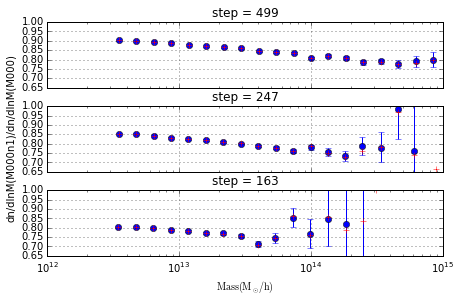

In [86]:
cmpLCDMnLCDM = CompareSims(LCDM, nLCDM)
df = cmpLCDMnLCDM.comparisons
df.to_csv('M000M000n1comparisons.csv', index=None)
fig = cmpLCDMnLCDM.plotSuppression()

### Power Spectrum of cb part (smooth nu approximation)

In [75]:
M000ps = psu.powerspectrum(koverh=None,
                           pstype="matter",
                           sigma8type="matter",
                           asciifile=M000simtransfer,
                           cosmo=M000.cosmo)
M000n1cbmps = psu.powerspectrum(koverh=None,
                               pstype="cbmatter",
                               sigma8type="matter",
                               asciifile=M000n1Simtransfer,
                               cosmo=M000n1.cosmo)
M011cbmps = psu.powerspectrum(koverh=None,
                               pstype="cbmatter",
                               sigma8type="matter",
                               asciifile=M011Simtransfer,
                               cosmo=M011.cosmo)

In [80]:
M011cbmps = psu.powerspectrum(koverh=None,
                               pstype="cbmatter",
                               sigma8type="matter",
                               asciifile=M011Simtransfer,
                               cosmo=M011.cosmo)

In [79]:
from lsscosmo import psutils as psu

## Calculate Halo Mass Functions at different time steps



In [91]:
massininvh = np.logspace(12, 15)
M000h = M000.cosmo.h
M000n1h = M000n1.cosmo.h
M011h = M011.cosmo.h
step=499
MF_M000_0 = hmf.dndlnM0(massininvh/M000h, ps=M000ps, cosmo=M000.cosmo,
                      z=M000.steptoredshift(step))/ M000h**3
MF_M000n1_0 = hmf.dndlnM0(massininvh/M000n1h, ps=M000n1cbmps, cosmo=M000n1.cosmo,
                      z=M000n1.steptoredshift(step))/ M000n1h**3
MF_M011_0 = hmf.dndlnM0(massininvh/M011h, ps=M000n1cbmps, cosmo=M011.cosmo,
                        z=M011.steptoredshift(step))/ M011h**3


step=247
MF_M000_1 = hmf.dndlnM0(massininvh/M000h, ps=M000ps, cosmo=M000.cosmo,
                      z=M000.steptoredshift(step))/ M000h**3
MF_M000n1_1 = hmf.dndlnM0(massininvh/M000n1h, ps=M000n1cbmps, cosmo=M000n1.cosmo,
                      z=M000n1.steptoredshift(step))/ M000n1h**3
MF_M011_1 = hmf.dndlnM0(massininvh/h, ps=M000n1cbmps, cosmo=M011.cosmo,
                        z=M011.steptoredshift(step))/ M011h**3

step=163
MF_M000_2 = hmf.dndlnM0(massininvh/M000h, ps=M000ps, cosmo=M000.cosmo,
                      z=M000.steptoredshift(step))/ M000h**3
MF_M000n1_2 = hmf.dndlnM0(massininvh/M000n1h, ps=M000n1cbmps, cosmo=M000n1.cosmo,
                      z=M000n1.steptoredshift(step))/ M000n1h**3
MF_M011_2 = hmf.dndlnM0(massininvh/M011h, ps=M000n1cbmps, cosmo=M011.cosmo,
                        z=M011.steptoredshift(step))/ M011h**3


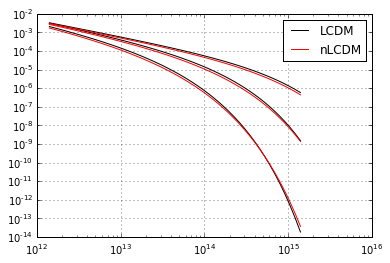

In [20]:
plt.loglog(massininvh/M000h , MF_M000_0, '-k', label='LCDM')
plt.loglog(massininvh/M000h , MF_M000_1, '-k')
plt.loglog(massininvh/M000h , MF_M000_2, '-k')
plt.loglog(massininvh/M000n1h , MF_M000n1_0, '-r', label='nLCDM')
plt.loglog(massininvh/M000n1h , MF_M000n1_1, '-r')
plt.loglog(massininvh/M000n1h , MF_M000n1_2, '-r')
plt.grid(True)
plt.legend(loc='best')

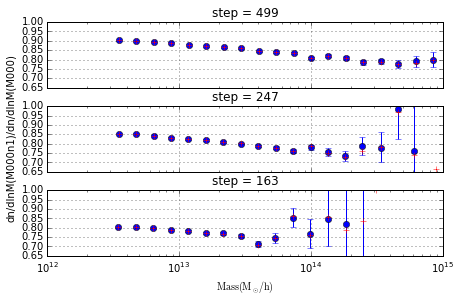

In [87]:
fig

In [88]:
fig.axes[1].set_ylabel('ratio of mass function for neutrino to mass funciton for LCDM')

In [89]:
example_data = '/Users/rbiswas/data/datastar'
datadir = os.path.join(example_data,'simulations/')
M000simtransfer = os.path.join(datadir,  "MiraU/Grid/M000/CAMB/cmbM000.tf")

M000indatfile = os.path.join(datadir, "MiraU/Grid/M000/L2100/HACC001/run/indat.params")
M000n1indatfile = "/Users/rbiswas/data/datastar/simulations/Neutrinos/M000n1/L2100/HACC000/run/indat.params"

M000simtransfer = os.path.join(datadir,  "MiraU/Grid/M000/CAMB/cmbM000.tf")
M000n1Simtransfer='/Users/rbiswas/data/datastar/simulations/Neutrinos/M000n1/CAMB/cmbM001n.tf'

M000 = hacc.haccsim(M000indatfile, name = "M000")
M000n1 = hacc.haccsim(M000n1indatfile, name = "M000n1")

printing omeganu **************
0.0
From indat  0.0
From cosmo  0.0
printing omeganu **************
0.01983733
From indat  0.01983733
From cosmo  0.01983733


In [92]:
fig.axes[0].plot(massininvh, MF_M000n1_0 / MF_M000_0, 'k')
fig.axes[1].plot(massininvh, MF_M000n1_1 / MF_M000_1, 'k')
fig.axes[2].plot(massininvh, MF_M000n1_2 / MF_M000_2, 'k')

fig.axes[0].plot(massininvh, MF_M011_0 / MF_M000_0, 'r')
fig.axes[1].plot(massininvh, MF_M011_1 / MF_M000_1, 'r')
fig.axes[2].plot(massininvh, MF_M011_2 / MF_M000_2, 'r')

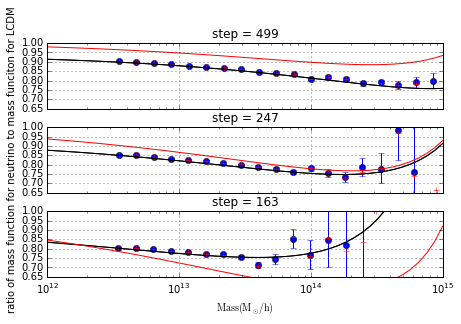

In [93]:
fig

In [58]:
fig.savefig('suppression_M000n1.pdf')

In [38]:
from interfacecosmology import psutils as psu

In [54]:
M000n1cbmps = psu.powerspectrum(koverh=None,
                               pstype="cbmatter",
                               sigma8type="matter",
                               asciifile=M000n1Simtransfer,
                               cosmo=M000n1.cosmo)
M000n1cbps = psu.powerspectrum(koverh=M000n1cbmps[0],
                               pstype="cb",
                               sigma8type="matter",
                               asciifile=M000n1Simtransfer,
                               cosmo=M000n1.cosmo)
M000n1ps = psu.powerspectrum(koverh=M000n1cbmps[0],
                             pstype="matter",
                             sigma8type="matter",
                             asciifile=M000n1Simtransfer,
                             cosmo=M000n1.cosmo)
M000n1cbmps_1 = psu.powerspectrum(koverh=None,
                                  z=1.0,
                                  pstype="cbmatter",
                                  sigma8type="matter",
                                  asciifile=M000n1Simtransfer,
                                  cosmo=M000n1.cosmo)
M000n1cbps_1 = psu.powerspectrum(koverh=M000n1cbmps[0],
                                 pstype="cb",
                                 meth
                                 z=1.0,
                                 sigma8type="matter",
                                 asciifile=M000n1Simtransfer,
                                 cosmo=M000n1.cosmo)
M000n1ps_1 = psu.powerspectrum(koverh=M000n1cbmps[0],
                               pstype="matter",
                               z=1.0,
                               sigma8type="matter",
                               asciifile=M000n1Simtransfer,
                               cosmo=M000n1.cosmo)

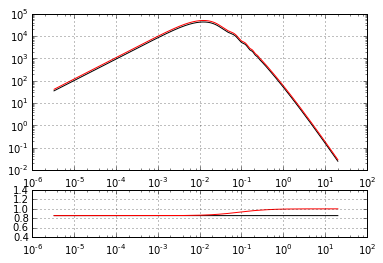

In [51]:
fig, ax0, ax1 = pu.settwopanel(setdifflimits=[0.4, 1.4])
ax0.plot(M000n1cbmps[0], M000n1cbmps[1], 'k')
ax0.plot(M000n1cbmps[0], M000n1cbps[1], 'r')
ax1.plot(M000n1cbmps[0], M000n1cbmps[1]/M000n1cbps[1], '-k')
ax1.plot(M000n1cbmps[0], M000n1cbmps[1]/M000n1ps[1], '-r')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax1.set_xscale('log')

(0.5, 1.5)

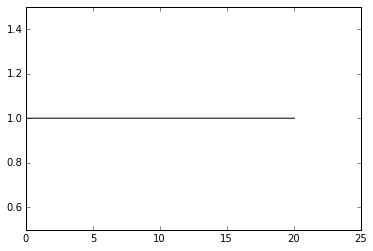

In [57]:
plt.plot(M000n1cbmps[0], M000n1cbmps_1[1]/M000n1cbmps[1], '-k')
plt.ylim(0.5, 1.5)

In [46]:
delta_omegam = M000n1.cosmo.Om0 - (M000n1.cosmo.Ob0 + M000n1.cosmo.Oc0)

In [47]:
delta_omegam / 

0.019837329999999986

## Scratch

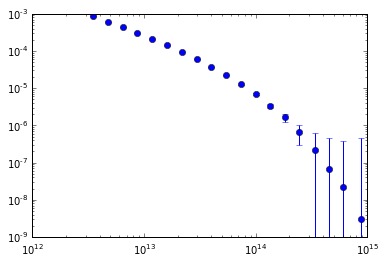

In [17]:
plt.errorbar(LCDM.mf_results(247).FOF_Mass,
             LCDM.mf_results(247).dndlnM, 
             yerr=LCDM.mf_results(247).frac_Err * LCDM.mf_results(499).dndlnM,
            fmt='o')
plt.xscale('log')
plt.yscale('log')

In [18]:
LCDM.mf_results(499)

,FOF_Mass,numClusters,dndlnM,frac_Err,oneoversigma,f(sigma),fsigma_fit,dn/dln_Mfit
0,3.484101e+12,1082834,0.001069,0.0010,0.6118,0.3197,0.3211,0.001073
1,4.732952e+12,819157,0.000808,0.0011,0.6426,0.3207,0.3221,0.000812
2,6.423003e+12,620573,0.000612,0.0013,0.6757,0.3210,0.3222,0.000615
3,8.715419e+12,466646,0.000460,0.0015,0.7114,0.3194,0.3212,0.000463
4,1.183044e+13,352417,0.000348,0.0017,0.7501,0.3188,0.3186,0.000348
5,1.606262e+13,262157,0.000259,0.0020,0.7920,0.3137,0.3143,0.000259
6,2.180363e+13,193991,0.000191,0.0023,0.8375,0.3067,0.3079,0.000192
7,2.960028e+13,141378,0.000140,0.0027,0.8869,0.2954,0.2989,0.000141
8,4.016602e+13,102901,0.000102,0.0031,0.9407,0.2840,0.2872,0.000103
9,5.449870e+13,73574,0.000073,0.0037,0.9993,0.2681,0.2722,0.000074


### For LCDM frac errors match calculation to rounding

In [19]:
xx = LCDM.mf_results(499).copy(deep=True)

In [20]:
xx['recalc'] = xx.numClusters**(-0.5)
xx[['recalc', 'frac_Err']]

,recalc,frac_Err
0,0.000961,0.0010
1,0.001105,0.0011
2,0.001269,0.0013
3,0.001464,0.0015
4,0.001685,0.0017
5,0.001953,0.0020
6,0.002270,0.0023
7,0.002660,0.0027
8,0.003117,0.0031
9,0.003687,0.0037


#### Roughly matches expectation

In [21]:
df.M000_MF * df.numClusters1**(-0.5) / df.ApproxErrorHigh

0     8.155155e-04
1     6.174969e-04
2     4.708310e-04
3     3.545583e-04
4     2.705113e-04
5     2.025196e-04
6     1.505353e-04
7     1.101655e-04
8     8.128796e-05
9     5.825866e-05
10    4.102348e-05
11    2.925124e-05
12    1.921025e-05
13    1.266308e-05
14    8.149507e-06
15    4.854172e-06
16    2.818878e-06
17    1.454904e-06
18    6.561413e-07
0     6.759506e-04
1     4.834035e-04
2     3.470978e-04
3     2.453769e-04
4     1.710966e-04
5     1.161154e-04
6     7.721547e-05
7     5.001131e-05
8     3.143715e-05
9     1.906971e-05
10    1.100809e-05
11    5.755816e-06
12    2.933857e-06
13    1.433011e-06
14    5.435414e-07
15    1.767254e-07
16    4.643254e-08
17    1.734052e-08
18             NaN
0     3.485959e-04
1     2.235978e-04
2     1.417031e-04
3     8.706170e-05
4     5.152754e-05
5     2.914194e-05
6     1.545438e-05
7     7.808857e-06
8     3.897166e-06
9     1.582751e-06
10    5.193547e-07
11    1.877631e-07
12    4.663675e-08
13    9.703840e-09
14    5.3345

In [22]:
df.M000_MF * df.numClusters1**(-0.5) / df.ApproxErrorLow

0     8.163213e-04
1     6.181987e-04
2     4.714475e-04
3     3.550941e-04
4     2.709837e-04
5     2.029307e-04
6     1.508913e-04
7     1.104712e-04
8     8.155395e-05
9     5.848444e-05
10    4.121374e-05
11    2.941539e-05
12    1.934213e-05
13    1.277129e-05
14    8.238142e-06
15    4.922347e-06
16    2.871506e-06
17    1.492376e-06
18    6.811491e-07
0     6.767114e-04
1     4.840471e-04
2     3.476475e-04
3     2.458431e-04
4     1.714884e-04
5     1.164395e-04
6     7.748191e-05
7     5.022741e-05
8     3.161055e-05
9     1.920608e-05
10    1.111333e-05
11    5.830527e-06
12    2.988619e-06
13    1.472113e-06
14    5.667058e-07
15    1.900352e-07
16    5.237010e-08
17    2.177197e-08
18             NaN
0     3.491648e-04
1     2.240540e-04
2     1.420678e-04
3     8.734961e-05
4     5.175043e-05
5     2.931129e-05
6     1.557799e-05
7     7.897965e-06
8     3.962879e-06
9     1.623380e-06
10    5.406050e-07
11    2.016607e-07
12    5.318188e-08
13    1.290975e-08
14    8.1698

In [23]:
from astropy.cosmology import Planck13 as cosmo


In [24]:
M000indatfile = os.path.join(datadir, "MiraU/Grid/M000/L2100/HACC001/run/indat.params")

NameError: name 'datadir' is not defined

In [33]:
from lsscosmo import halomassfunction as hmf
from lsscosmo import psutils as psu
from lsscosmo import hacc

example_data = '/Users/rbiswas/data/datastar'
datadir = os.path.join(example_data,'simulations/')
M000simtransfer = os.path.join(datadir,  "MiraU/Grid/M000/CAMB/cmbM000.tf")

M000indatfile = os.path.join(datadir, "MiraU/Grid/M000/L2100/HACC001/run/indat.params")
M000n1indatfile = "/Users/rbiswas/data/datastar/simulations/Neutrinos/M000n1/L2100/HACC000/run/indat.params"

M000simtransfer = os.path.join(datadir,  "MiraU/Grid/M000/CAMB/cmbM000.tf")
M000n1Simtransfer='/Users/rbiswas/data/datastar/simulations/Neutrinos/M000n1/CAMB/cmbM001n.tf'

M000 = hacc.haccsim(M000indatfile, name = "M000")
M000n1 = hacc.haccsim(M000n1indatfile, name = "M000n1")

In [42]:
M000ps = psu.powerspectrum(koverh=None,
                           pstype="matter",
                           sigma8type="matter",
                           asciifile=M000simtransfer,
                           cosmo=M000.cosmo)
M000n1cbmps = psu.powerspectrum(koverh=None,
                               pstype="cbmatter",
                               sigma8type="matter",
                               asciifile=M000n1Simtransfer,
                               cosmo=M000n1.cosmo)

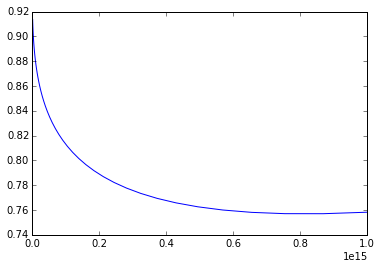

In [52]:
massininvh = np.logspace(12, 15)
M000h = M000.cosmo.h
step=499
MF_M000_0 = hmf.dndlnM0(massininvh/M000h, ps=M000ps, cosmo=M000.cosmo,
                      z=M000.steptoredshift(step))/ M000h**3
h = M000n1.cosmo.h
MF_M000n1_0 = hmf.dndlnM0(massininvh/h, ps=M000n1cbmps, cosmo=M000n1.cosmo,
                      z=M000n1.steptoredshift(step))/ h**3
step=247
MF_M000_1 = hmf.dndlnM0(massininvh/M000h, ps=M000ps, cosmo=M000.cosmo,
                      z=M000.steptoredshift(step))/ M000h**3
h = M000n1.cosmo.h
MF_M000n1_1 = hmf.dndlnM0(massininvh/h, ps=M000n1cbmps, cosmo=M000n1.cosmo,
                      z=M000n1.steptoredshift(step))/ h**3
step=163
MF_M000_2 = hmf.dndlnM0(massininvh/M000h, ps=M000ps, cosmo=M000.cosmo,
                      z=M000.steptoredshift(step))/ M000h**3
h = M000n1.cosmo.h
MF_M000n1_2 = hmf.dndlnM0(massininvh/h, ps=M000n1cbmps, cosmo=M000n1.cosmo,
                      z=M000n1.steptoredshift(step))/ h**3



plt.plot(massininvh, MF_M000n1 / MF_M000)



In [31]:
dir(LCDM)


['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'filelist',
 'interpolated_MF',
 'massrange',
 'mf_fname',
 'mf_results',
 'name',
 'simDir']

In [44]:
massininvh = np.logspace(12,15)

In [45]:
massininvh

array([  1.00000000e+12,   1.15139540e+12,   1.32571137e+12,
         1.52641797e+12,   1.75751062e+12,   2.02358965e+12,
         2.32995181e+12,   2.68269580e+12,   3.08884360e+12,
         3.55648031e+12,   4.09491506e+12,   4.71486636e+12,
         5.42867544e+12,   6.25055193e+12,   7.19685673e+12,
         8.28642773e+12,   9.54095476e+12,   1.09854114e+13,
         1.26485522e+13,   1.45634848e+13,   1.67683294e+13,
         1.93069773e+13,   2.22299648e+13,   2.55954792e+13,
         2.94705170e+13,   3.39322177e+13,   3.90693994e+13,
         4.49843267e+13,   5.17947468e+13,   5.96362332e+13,
         6.86648845e+13,   7.90604321e+13,   9.10298178e+13,
         1.04811313e+14,   1.20679264e+14,   1.38949549e+14,
         1.59985872e+14,   1.84206997e+14,   2.12095089e+14,
         2.44205309e+14,   2.81176870e+14,   3.23745754e+14,
         3.72759372e+14,   4.29193426e+14,   4.94171336e+14,
         5.68986603e+14,   6.55128557e+14,   7.54312006e+14,
         8.68511374e+14,